In [3]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
men = df_train.loc[df_train['Sex'] == 'male']['Survived']
perc_men = sum(men)/len(men)*100

print("% of men who survived:", perc_men)

% of men who survived: 18.890814558058924


In [9]:
women = df_train.loc[df_train['Sex'] == 'female']['Survived']
perc_women = sum(women)/len(women)*100

print("% of men who survived:", perc_women)

% of men who survived: 74.20382165605095


<AxesSubplot:xlabel='Sex', ylabel='count'>

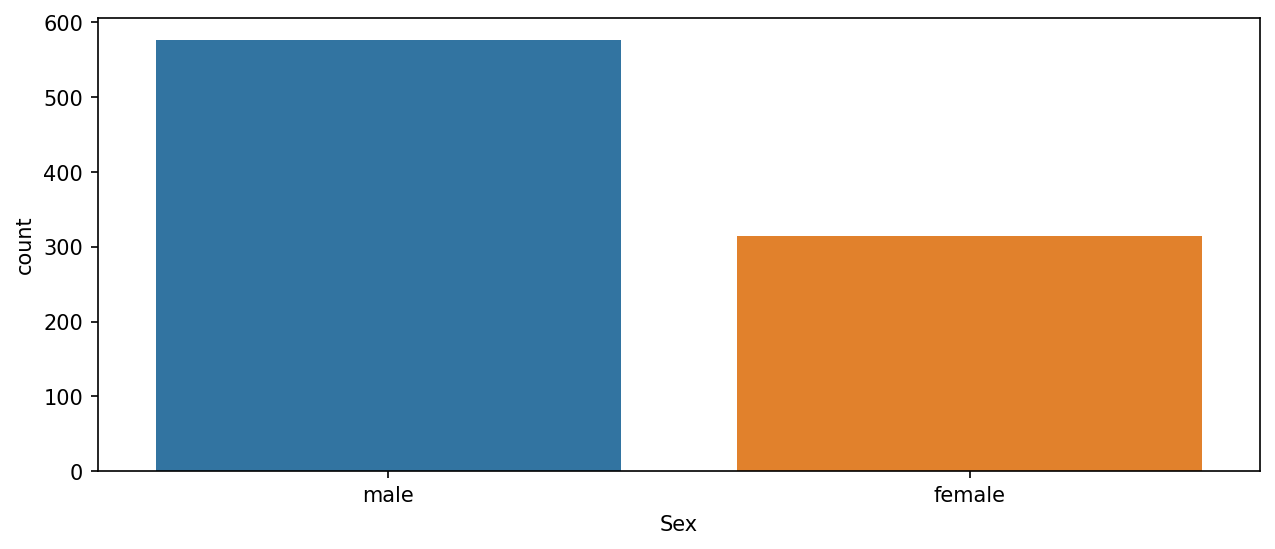

In [10]:
plt.figure(figsize=(10,4),dpi = 150)
sns.countplot(x = 'Sex', data = df_train)

<AxesSubplot:>

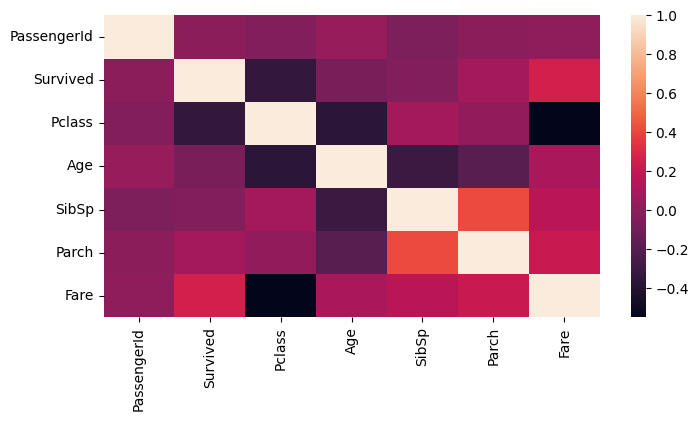

In [11]:
plt.figure(figsize=(8,4),dpi=100)
sns.heatmap(data =df_train.corr())

In [12]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [1]:
df_train.describe()

NameError: name 'df_train' is not defined

In [18]:
X = pd.get_dummies(df_train.drop(('Sex'),axis=1))
y = df_train['Sex']

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [29]:
y = df_train['Survived']
features = ["Pclass","Sex","SibSp","Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state= 101)
model.fit(X,y)

RandomForestClassifier(max_depth=5, random_state=101)

In [30]:
predict = model.predict(X_test)

In [33]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived':predict})
output.to_csv('my_sub2.csv',index=False)
print("Submission successfully saved")

Submission successfully saved


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
cm = confusion_matrix(X_test, predict)
print(cm)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets